

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>



# **Employee Churn Analysis Project**

# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 5. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 6. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

###**Importing Modules and Predefined Functions**

In [ ]:
# Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [ ]:
#connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HR_Dataset.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


##**1. Exploratory Data Analysis**

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(14999, 10)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [ ]:
#Is there any Null values?
df.isnull().sum().any()

False

In [ ]:
#Is there any dulicated values?
df.duplicated().sum()

3008

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

#####**In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.**

In [ ]:
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [ ]:
#Compute the average for both groups by using groupby()and mean() functions
left = df.groupby('left')
left.mean()
#Employees who left the company exhibited lower satisfaction levels, a decreased rate of promotions,
#lower salaries, and a higher workload in comparison to those who remained with the organization.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


## **2. Data Visualization**

Text(0.5, 0, 'left or stayed')

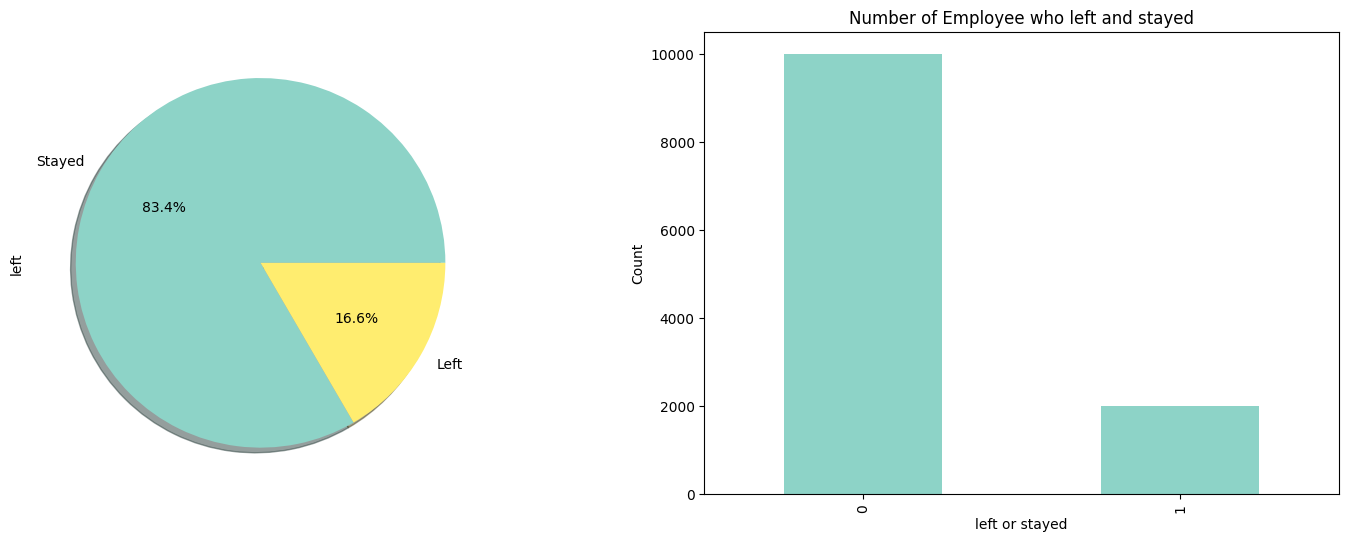

In [ ]:
#illustrating the distribution of values in the "left" column of the Dataset
f,ax = plt.subplots(1,2, figsize=(18,6))
df['left'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3', labels = ["Stayed", "Left"])
df['left'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title(f'Number of Employee who left and stayed')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('left or stayed')

In [ ]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

**Approximately 2,000 employees chose to leave the company, while around 10,000 people opted to stay**

Text(0, 0.5, 'Number of Employees')

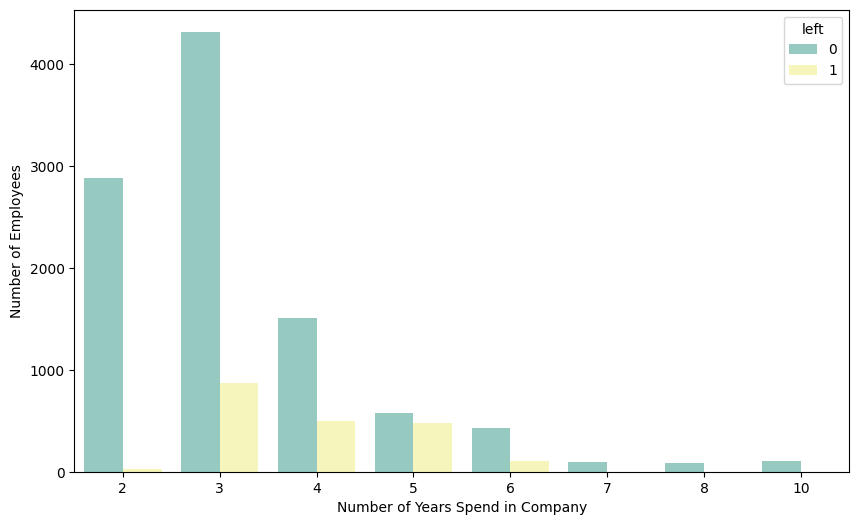

In [ ]:
# Time spent in the company
sns.countplot(x='time_spend_company', data=df, hue='left', palette='Set3');
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')

Most of the employee experience is between 2–4 years. Also, there is a huge gap between 3 years and 4 years of experienced employees.

**Most employees have worked at the company for 2 to 4 years, and the highest number of them have been there for 3 years.**

Text(0, 0.5, 'Number of Employees')

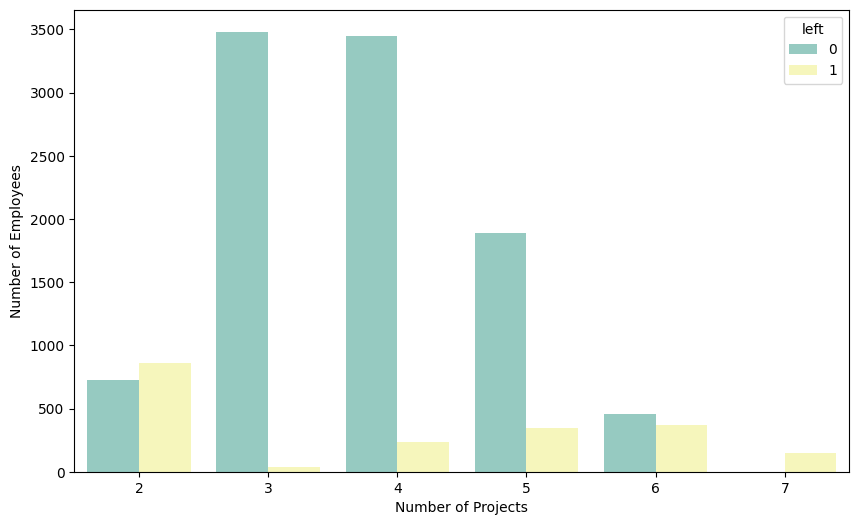

In [ ]:
#number of projects
sns.countplot(x='number_project', data=df, hue='left', palette='Set3')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')

**Majority of the people assigned 5 or fewer projects. Only a small percentage handling 7 projects.**

Text(0.5, 0, 'Departments')

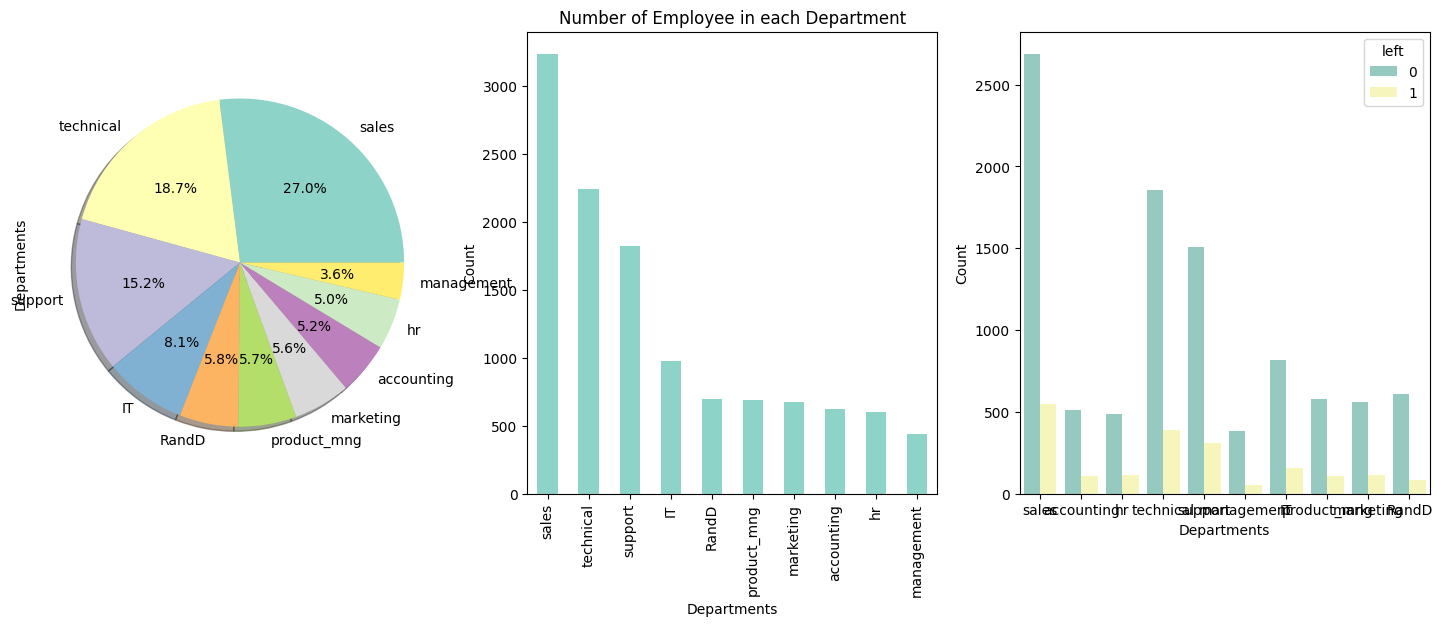

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Departments '].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Departments '].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title(f'Number of Employee in each Department')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Departments')
sns.countplot(x='Departments ', data=df, hue='left', palette='Set3', ax=ax[2])
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Departments')

Text(0.5, 0, 'Salary level')

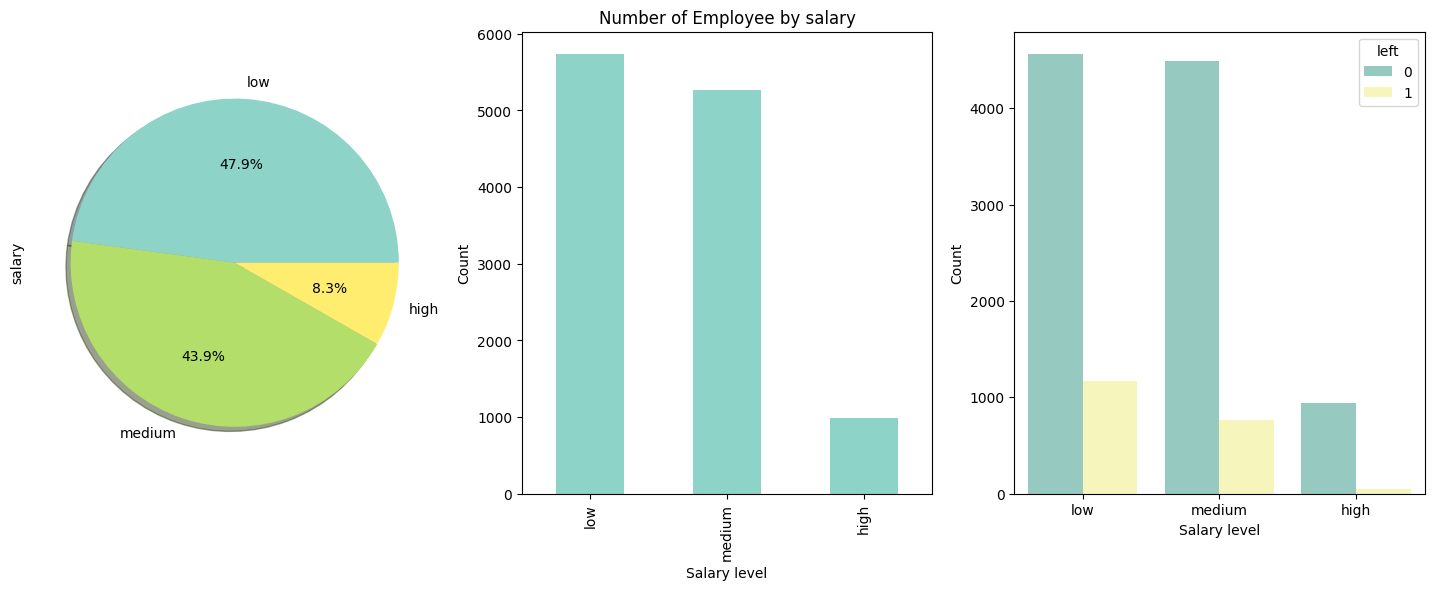

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['salary'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['salary'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title(f'Number of Employee by salary')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Salary level')
sns.countplot(x='salary', data=df, hue='left', palette='Set3', ax=ax[2])
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Salary level')

Text(0.5, 0, 'Work accident')

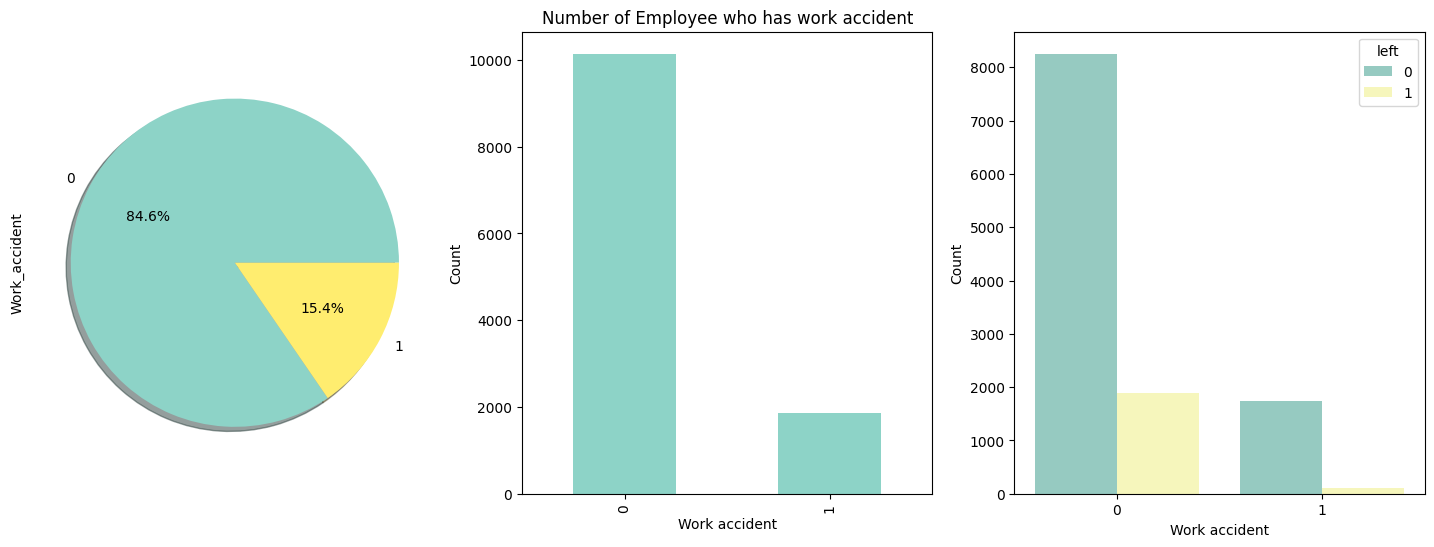

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['Work_accident'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['Work_accident'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title(f'Number of Employee who has work accident')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Work accident')
sns.countplot(x='Work_accident', data=df, hue='left', palette='Set3', ax=ax[2])
ax[2].set_ylabel('Count')
ax[2].set_xlabel('Work accident')

**we can say, there is no big relation between leaving employees their jobs and work accidents**

Text(0.5, 0, 'promotion')

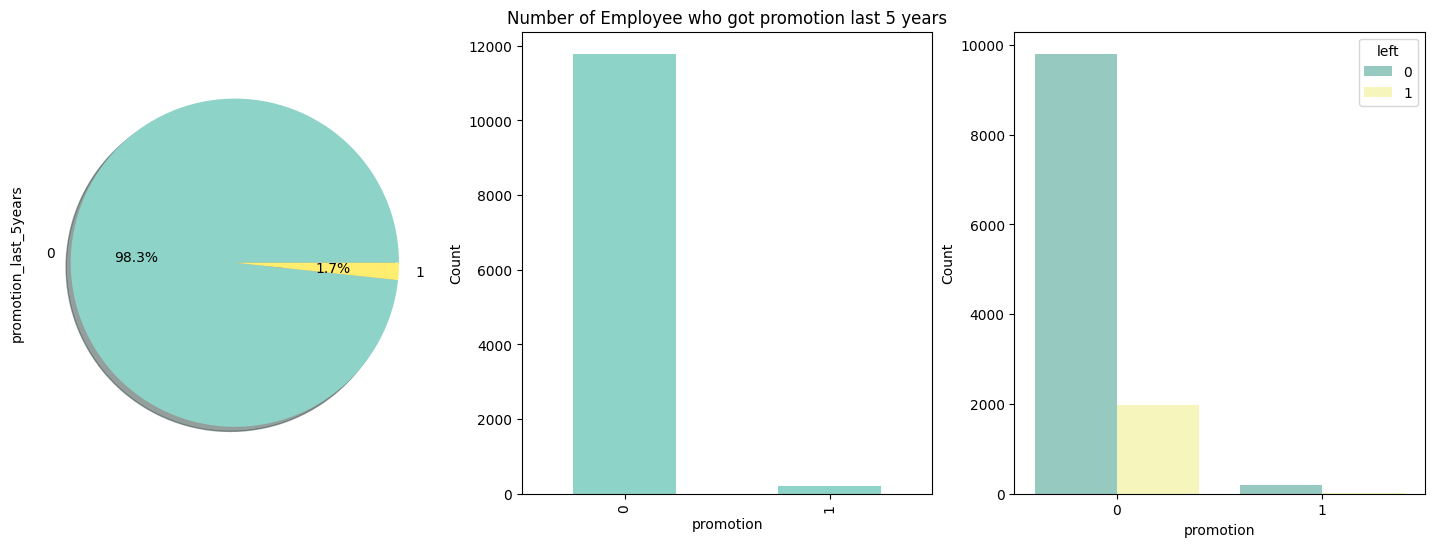

In [ ]:
f,ax = plt.subplots(1,3, figsize=(18,6))
df['promotion_last_5years'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
df['promotion_last_5years'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
ax[1].set_title(f'Number of Employee who got promotion last 5 years')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('promotion')
sns.countplot(x='promotion_last_5years', data=df, hue='left', palette='Set3', ax=ax[2])
ax[2].set_ylabel('Count')
ax[2].set_xlabel('promotion')

**Employees are far more likely to quit their job if they haven’t received a promotion in the last 5 years**

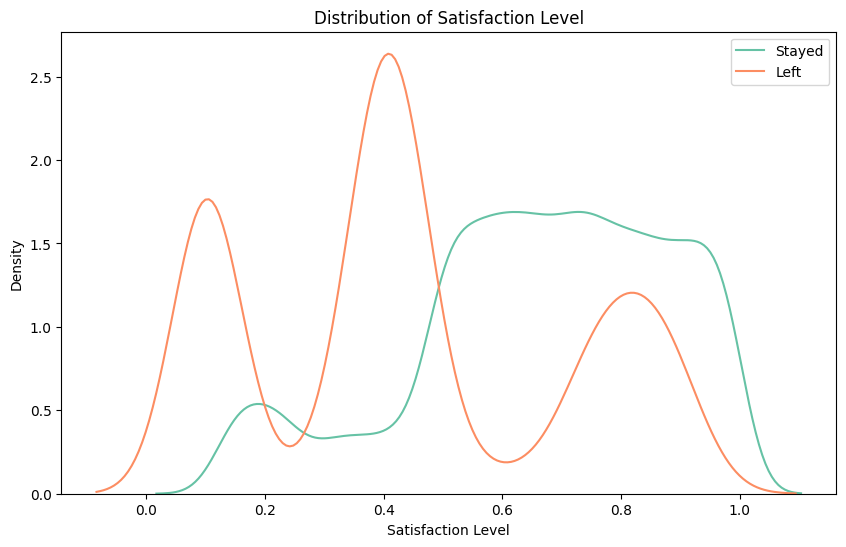

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'satisfaction_level' for employees who left and stayed
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label='Stayed')
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label='Left')
plt.title('Distribution of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.legend()
plt.show()


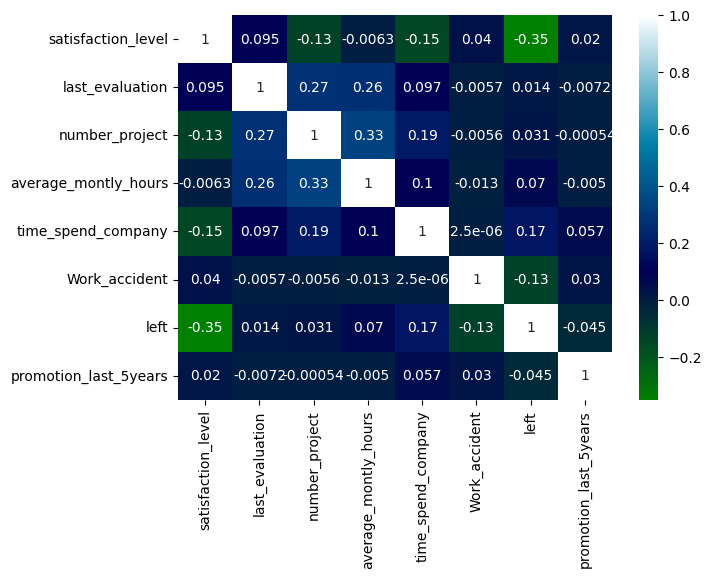

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True, cmap="ocean"); #there is no strong correlation between features

## 4. Cluster Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Selecting relevant features for clustering
cluster_features = df[['satisfaction_level', 'last_evaluation']]

In [ ]:
# Standardize the features
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

In [ ]:
ssd = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((cluster_features_scaled))
    ssd.append(kmeans.inertia_)

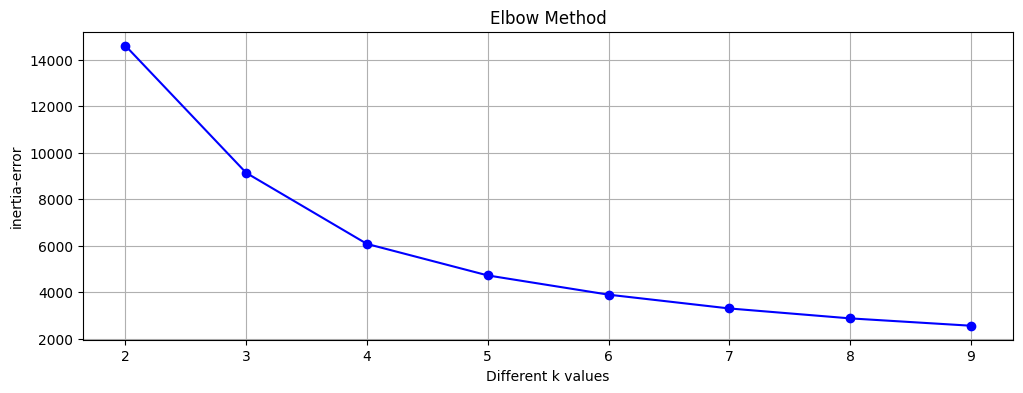

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [ ]:
ssd =[]

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(cluster_features_scaled)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(cluster_features_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.3757546521939191
Silhouette Score for 3 clusters: 0.41945799602776845
Silhouette Score for 4 clusters: 0.42511094524783666
Silhouette Score for 5 clusters: 0.41593350449369304
Silhouette Score for 6 clusters: 0.40412582207207143
Silhouette Score for 7 clusters: 0.3950838854852041
Silhouette Score for 8 clusters: 0.3800906288228516
Silhouette Score for 9 clusters: 0.3828653004751504


In [ ]:
print(df.columns.tolist())

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Departments ', 'salary']


In [ ]:
num_clusters = 4

# Applying KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_features_scaled)

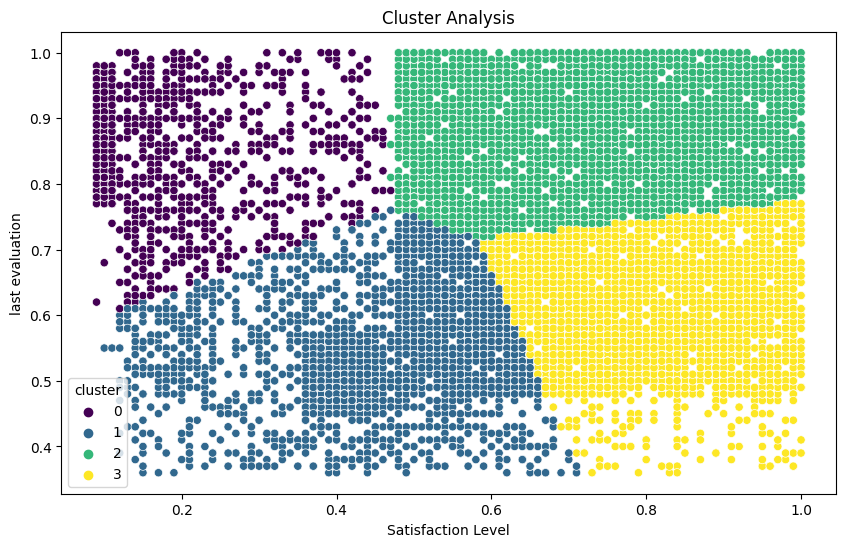

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df, palette='viridis')
plt.title('Cluster Analysis')
plt.xlabel('Satisfaction Level')
plt.ylabel('last evaluation')
plt.show()

**Cluster 0: high last evaluation but low satisfaction->Frustrated**

**Cluster 1: Moderate tend to low last evaluation and Moderate tend to low satisfaction-> Almost Frustrated**

**Cluster 2: high last evaluation and high satisfaction->Winners**

**Cluster 3: Moderate last evaluation and high satisfaction->Satisfied**

## 5. Predictive Model Building

### Preprocessing

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'promotion_last_5years', 'Work_accident' ,'Departments ', 'salary']]
y=df['left']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
num = X_train.select_dtypes("number").columns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(categories=[['low', 'medium', 'high']])
one_enc = OneHotEncoder()
scaler = StandardScaler()
column_trans = make_column_transformer((ord_enc, ["salary"] ),(one_enc, ["Departments "]), (scaler, num ))

#### Model Building

In [ ]:
# Building a logistic regression model
from sklearn.pipeline import Pipeline
operations = [("Encoder_scaler", column_trans),
              ("logistic", LogisticRegression(random_state=42, class_weight="balanced"))]

model = Pipeline(steps=operations)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(100 * '-')
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(model, X_train, y_train, X_test, y_test)

Test_Set
[[1540  461]
 [  63  335]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399

----------------------------------------------------------------------------------------------------
Train_Set
[[6080 1919]
 [ 279 1314]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.86      0.77      0.80      9592



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score

scoring = {
    "precision_1": make_scorer(
        precision_score, average=None, labels=[1]
    ),
    "recall_1": make_scorer(recall_score, average=None, labels=[1]),
    "f1_1": make_scorer(f1_score, average=None, labels=[1]),
}

In [ ]:
scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_1     0.405506
train_precision_1    0.405914
test_recall_1        0.824874
train_recall_1       0.824789
test_f1_1            0.543551
train_f1_1           0.544067
dtype: float64

In [ ]:
pip install scikit-plot

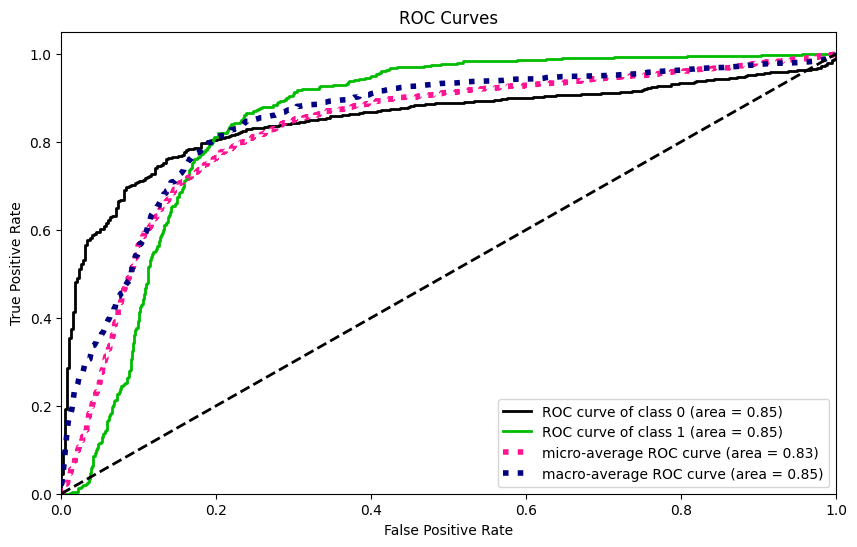

In [ ]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
y_pred_proba = model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_proba = model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.3948665589873839

In [ ]:
#scores

y_pred_r = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

lr_accuracy = model.score(X_test, y_test)
lr_precision = precision_score(y_test, y_pred_r)
lr_recall = recall_score(y_test, y_pred_r)
lr_f1 = f1_score(y_test, y_pred_r)
lr_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

####  Prediction

In [ ]:
single_emp = df.drop("left", axis=1).iloc[27:28, :]
single_emp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,cluster
27,0.4,0.49,2,135,3,0,0,sales,low,1


In [ ]:
(model.predict(single_emp) > 0.5).astype("int32")

array([1], dtype=int32)

In [ ]:
df["left"].iloc[27]

1

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'pred': y_pred_r})
predictions

,Actual,pred
11555,0,0
27,1,1
5890,0,1
9098,0,0
239,1,1
...,...,...
9158,0,0
8190,0,0
4911,0,0
11196,0,1


#### Model Building

In [ ]:
scaler = StandardScaler()
column_trans = make_column_transformer((OrdinalEncoder(), ['Departments ']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), (scaler, num ),
                                        remainder='passthrough')

In [ ]:
from sklearn.ensemble import RandomForestClassifier


operations = [("OrdinalEncoder_Scaler", column_trans),
              ("RF_model", RandomForestClassifier(random_state=42, class_weight="balanced"))]

model_rf = Pipeline(steps=operations)

model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder_Scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments ']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'promotion_last_5years',
       'Work_accident'],
      dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [ ]:
eval_metric(model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[1998    3]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399

----------------------------------------------------------------------------------------------------
Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [ ]:
scoring = {
    "precision_1": make_scorer(
        precision_score, average=None, labels=[1]
    ),
    "recall_1": make_scorer(recall_score, average=None, labels=[1]),
    "f1_1": make_scorer(f1_score, average=None, labels=[1]),
}

In [ ]:
scores = cross_validate(
    model_rf, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_1     0.989806
train_precision_1    1.000000
test_recall_1        0.906454
train_recall_1       1.000000
test_f1_1            0.946150
train_f1_1           1.000000
dtype: float64

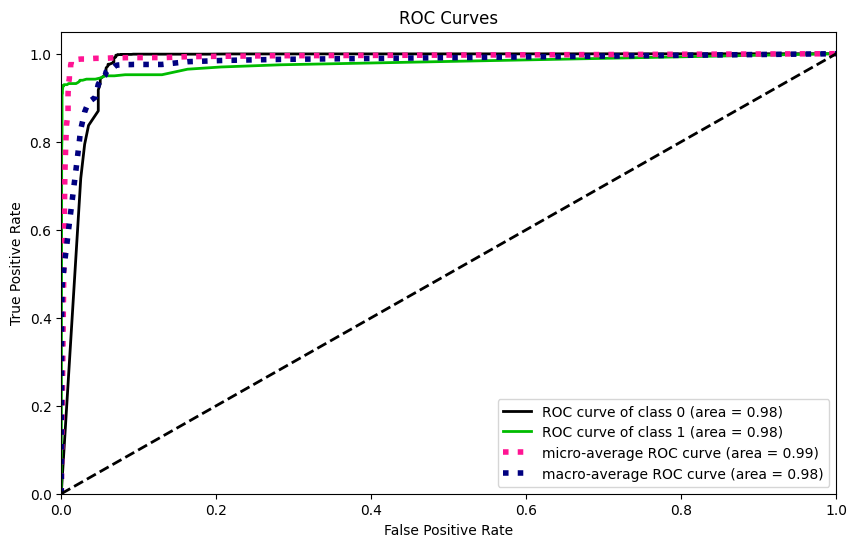

In [ ]:
y_pred_proba = model_rf.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_proba = model_rf.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9609890794266851

In [ ]:
#scores

y_pred_rf = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)

rf_accuracy = model_rf.score(X_test, y_test)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

####  Prediction

In [ ]:
single_emp = df.drop("left", axis=1).iloc[2:3, :]
single_emp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,cluster
2,0.11,0.88,7,272,4,0,0,sales,medium,0


In [ ]:
(model_rf.predict(single_emp) > 0.5).astype("int32")

array([1], dtype=int32)

In [ ]:
df["left"].iloc[2]

1

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'pred': y_pred_rf})
predictions

,Actual,pred
11555,0,0
27,1,1
5890,0,0
9098,0,0
239,1,1
...,...,...
9158,0,0
8190,0,0
4911,0,0
11196,0,0


#### Model Building

In [ ]:
# Building a XGBOOST model
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
XGB_model = XGBClassifier(random_state=42)
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)]

In [ ]:
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments ']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1987   14]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

----------------------------------------------------------------------------------------------------
Train_Set
[[7993    6]
 [  30 1563]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



In [ ]:
scoring = {
    "precision_1": make_scorer(
        precision_score, average=None, labels=[1]
    ),
    "recall_1": make_scorer(recall_score, average=None, labels=[1]),
    "f1_1": make_scorer(f1_score, average=None, labels=[1]),
}

In [ ]:
# Cross-validation
scores = cross_validate(
    pipe_model, X_train, y_train,
    scoring=scoring,
    cv=10, return_train_score=True
    )
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_precision_1     0.970416
train_precision_1    0.996258
test_recall_1        0.917748
train_recall_1       0.983957
test_f1_1            0.943201
train_f1_1           0.990068
dtype: float64

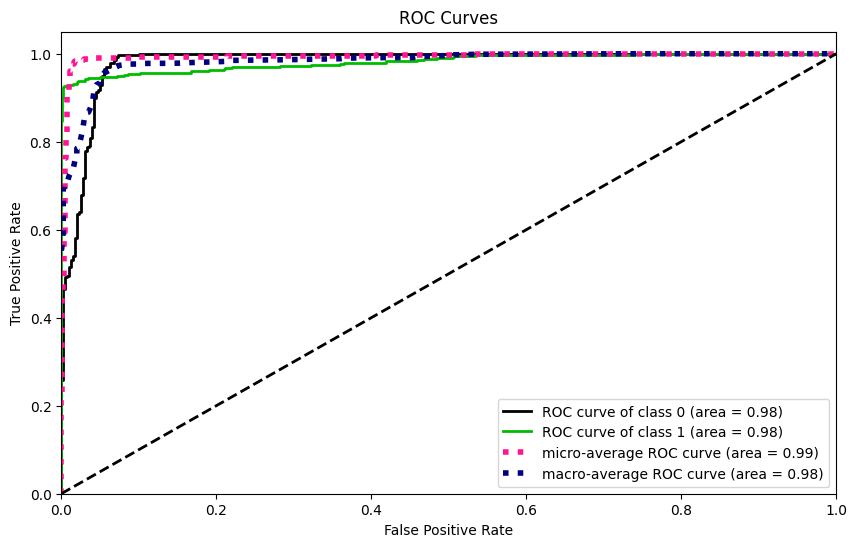

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_proba = pipe_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9665823061934374

In [ ]:
#scores

y_pred_xgb =pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

xgb_accuracy = pipe_model.score(X_test, y_test)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

####  Prediction

In [ ]:
single_emp = df.drop("left", axis=1).iloc[8190:8191, :]

In [ ]:
(pipe_model.predict(single_emp) > 0.5).astype("int32")

array([0], dtype=int32)

In [ ]:
df["left"].iloc[8190]

0

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'pred': y_pred_xgb})
predictions

,Actual,pred
11555,0,0
27,1,1
5890,0,0
9098,0,0
239,1,1
...,...,...
9158,0,0
8190,0,0
4911,0,0
11196,0,0


#### Model Building

In [ ]:
scaler = StandardScaler()
column_trans = make_column_transformer((OrdinalEncoder(), ['Departments ']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), (scaler, num ),
                                        remainder='passthrough')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


operations = [("OrdinalEncoder_Scaler", column_trans),
              ("KNN_Model", KNeighborsClassifier(n_neighbors=5))]

KNN_Model = Pipeline(steps=operations)

KNN_Model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder_Scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['Departments ']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'promotion_last_5years',
       'Work_accident'],
      dtype='object'))])),
                ('KNN_Model', KNeighborsClassifier())])

#### Evaluating Model Performance and Tuning
- Compare model performances according to metrics you choose for the problem.

In [ ]:
eval_metric(KNN_Model, X_train, y_train, X_test, y_test)

Test_Set
[[1931   70]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.92      0.88       398

    accuracy                           0.96      2399
   macro avg       0.91      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399

----------------------------------------------------------------------------------------------------
Train_Set
[[7820  179]
 [ 151 1442]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.89      0.91      0.90      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.94      0.94      9592
weighted avg       0.97      0.97      0.97      9592



In [ ]:
scoring = {
    "precision_1": make_scorer(
        precision_score, average=None, labels=[1]
    ),
    "recall_1": make_scorer(recall_score, average=None, labels=[1]),
    "f1_1": make_scorer(f1_score, average=None, labels=[1]),
}

In [ ]:
scores = cross_validate(
    KNN_Model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_1     0.849136
train_precision_1    0.884507
test_recall_1        0.895763
train_recall_1       0.904303
test_f1_1            0.871492
train_f1_1           0.894292
dtype: float64

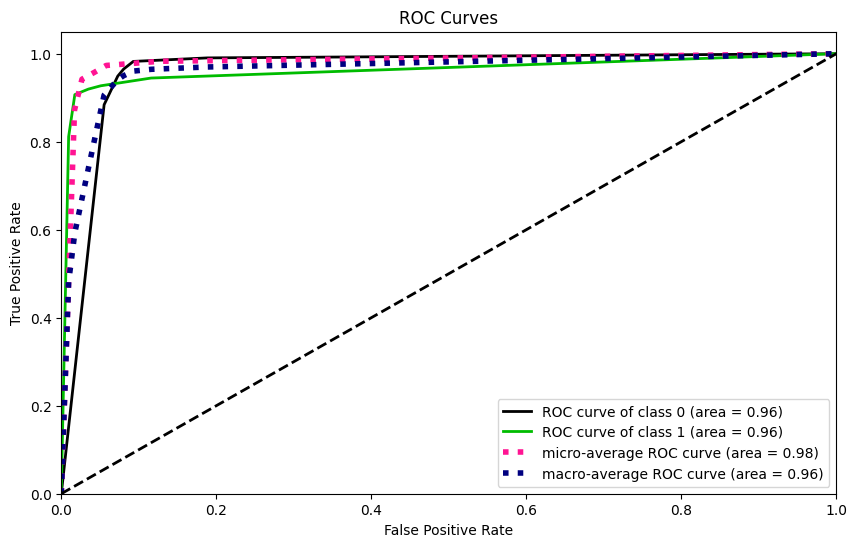

In [ ]:
y_pred_proba = KNN_Model.predict_proba(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_proba = KNN_Model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.8900083852990648

In [ ]:
#scores

y_pred_KNN = KNN_Model.predict(X_test)
y_pred_proba = KNN_Model.predict_proba(X_test)

KNN_accuracy = KNN_Model.score(X_test, y_test)
KNN_precision = precision_score(y_test, y_pred_KNN)
KNN_recall = recall_score(y_test, y_pred_KNN)
KNN_f1 = f1_score(y_test, y_pred_KNN)
KNN_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

####  Prediction

In [ ]:
single_emp = df.drop("left", axis=1).iloc[2:3, :]
single_emp

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,cluster
2,0.11,0.88,7,272,4,0,0,sales,medium,0


In [ ]:
(KNN_Model.predict(single_emp) > 0.5).astype("int32")

array([1], dtype=int32)

In [ ]:
df["left"].iloc[2]

1

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'pred': y_pred_xgb})
predictions

,Actual,pred
11555,0,0
27,1,1
5890,0,0
9098,0,0
239,1,1
...,...,...
9158,0,0
8190,0,0
4911,0,0
11196,0,0


## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

In [ ]:
compare = pd.DataFrame({
            'Model': ['Logistic Regression',  'Random Forest', 'XGB Model', 'KNN_Model'],
            'accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy, KNN_accuracy],
            'precision': [lr_precision, rf_precision, xgb_precision,KNN_precision],
            'recall': [lr_recall, rf_recall, xgb_recall,KNN_recall],
            'f1': [lr_f1, rf_f1, xgb_f1, KNN_f1],
            'precision_recall': [lr_precision_recall, rf_precision_recall, xgb_precision_recall,KNN_precision_recall ]
})
compare

,Model,accuracy,precision,recall,f1,precision_recall
0,Logistic Regression,0.781576,0.420854,0.841709,0.561139,0.394867
1,Random Forest,0.985827,0.991892,0.922111,0.955729,0.960989
2,XGB Model,0.982076,0.963446,0.927136,0.944942,0.966582
3,KNN_Model,0.957482,0.839450,0.919598,0.877698,0.890008


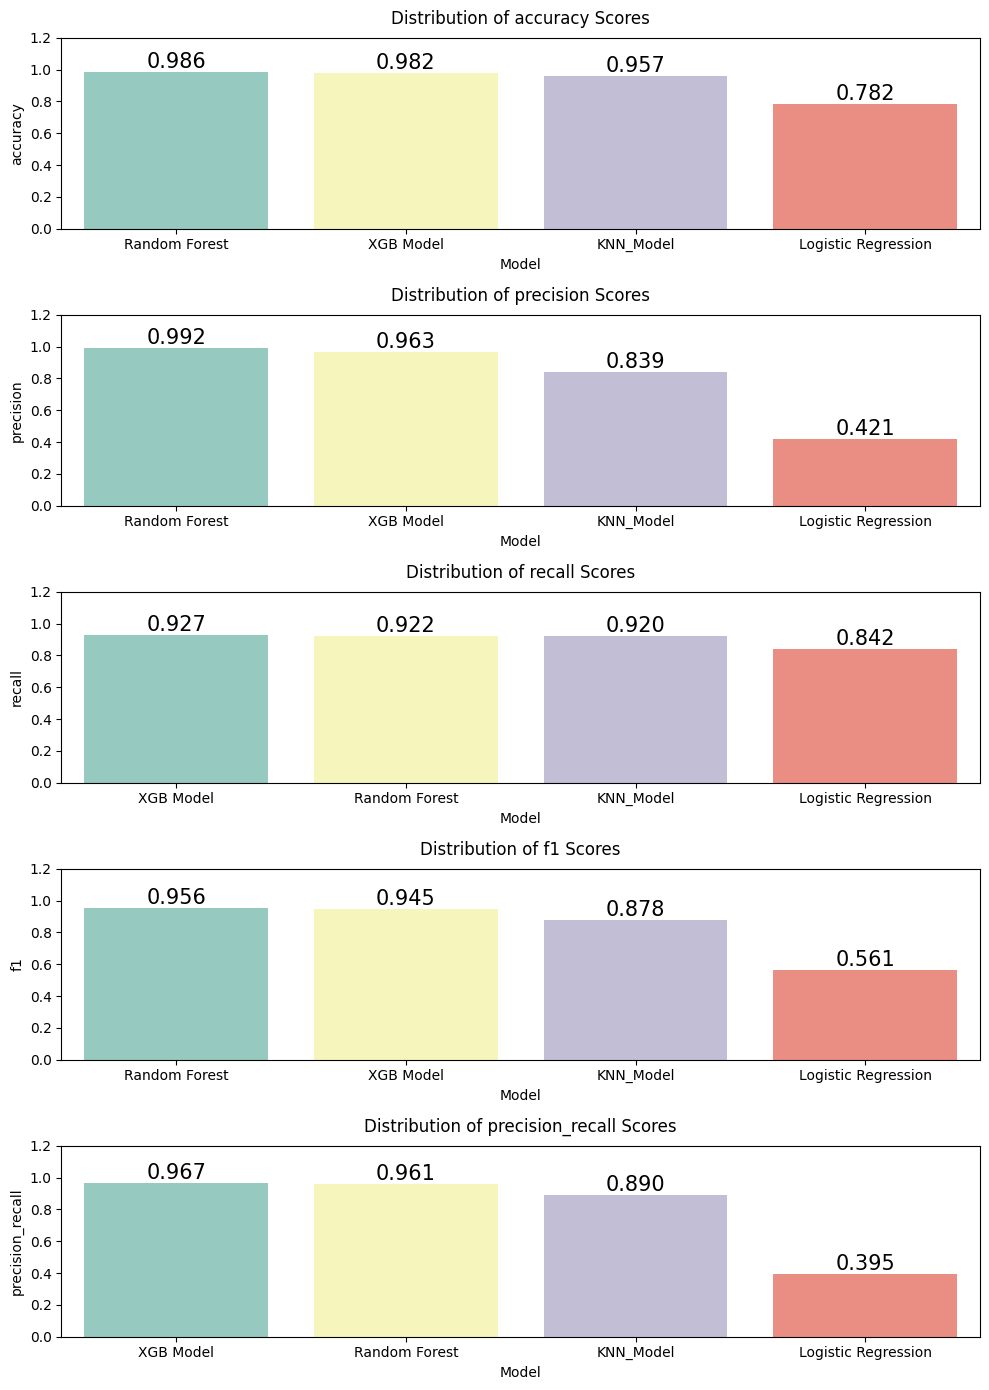

In [ ]:
plt.figure(figsize=(10,14))

index = 0

for col in compare.iloc[:, 1:].columns:
    index += 1
    plt.subplot(5,1,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x='Model', y=col, palette='Set3')
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=15), plt.ylim(0, 1.2)
    plt.title(f'Distribution of {col} Scores', fontsize=12, pad=10)
plt.tight_layout()

### Save and Export the Best Model

In [ ]:
from tensorflow.keras.models import load_model
import pickle

In [ ]:
pickle.dump(model_rf, open("model_rf", "wb"))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___